# Tutorial 5: Recurrent Neural Networks with tensorflow(Long Short-Term Memory (LSTM) Networks)

## Overview

Welcome to the Python Tutorial on Long Short-Term Memory (LSTM) Networks! In this tutorial, we will dive into one of the most powerful and widely used architectures in the realm of Recurrent Neural Networks (RNNs). LSTMs are designed to overcome the limitations of traditional RNNs when dealing with long-range dependencies in sequential data.

LSTMs are particularly effective in handling sequential data, such as time series, natural language, and audio. They have found applications in various domains, including language translation, sentiment analysis, speech recognition, and more.

In this comprehensive guide, we will explore the fundamental concepts of LSTMs, their unique architecture, and the mathematics behind their functioning. We will also walk through the implementation of LSTMs in Python using popular deep learning libraries.

## Prerequisites

Before diving into this tutorial, it is recommended to have a solid understanding of the following topics:

- Python programming fundamentals
- Basics of machine learning and neural networks
- Recurrent Neural Networks (RNNs) - Understanding their working will provide a good foundation for LSTMs.

Knowledge of libraries like NumPy, Pandas, and Keras (or TensorFlow) will be beneficial, as we will use them for data manipulation and implementation.

You may need to install tensorflow and keras before getting started:

```python
pip install tensorflow
```
Then, using the command in the terminal:

```python
pip install keras
```

## What You'll Learn

By the end of this tutorial, you will:

- Understand the core concepts of Long Short-Term Memory (LSTM) networks.
- Comprehend the challenges faced by traditional RNNs and how LSTMs overcome them.
- Know the internal structure and working mechanism of LSTMs.
- Implement LSTMs using Python and Keras (or TensorFlow) for various applications.
- Handle sequential data, perform time series prediction, and process natural language using LSTMs.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Predict the next data using the 3 previous data:

X1	 X2	 X3	 Y

112	118	132	129

118	132	129	121

data format:
x -> y = [93,1,3] -> [93,1]

x = [
    [[x1,x2,x3]], 
    [[x1,x2,x3]], 
     ...]

y = [
    [y1],
    [y2],
     ...]
   
input_shape=(1,3)

You can change the parameter to change the prediction step:
look_back = 3

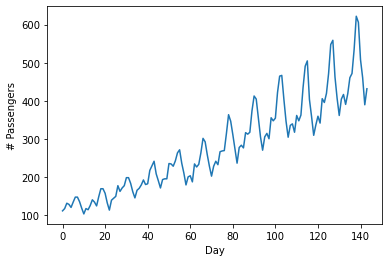

In [2]:
# load the dataset
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
plt.plot(dataset)
plt.xlabel('Day')
plt.ylabel('# Passengers')
plt.show()

In [4]:
# Generate the dataset format
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split dataset into training and test (2 : 1)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train_data, test_data = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# prediction step = 3
# create dataset for training and testing
look_back = 3
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# Reshape: [samples, time steps, features] = [93,1,3]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print('The shape of X:', trainX.shape)
print('The shape of Y:', trainY.shape)

The shape of X: (93, 1, 3)
The shape of Y: (93,)


In [8]:
# define the model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# train the model
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose=2)

Epoch 1/100
93/93 - 4s - loss: 0.0288 - 4s/epoch - 46ms/step
Epoch 2/100
93/93 - 0s - loss: 0.0107 - 128ms/epoch - 1ms/step
Epoch 3/100
93/93 - 0s - loss: 0.0082 - 115ms/epoch - 1ms/step
Epoch 4/100
93/93 - 0s - loss: 0.0070 - 124ms/epoch - 1ms/step
Epoch 5/100
93/93 - 0s - loss: 0.0060 - 114ms/epoch - 1ms/step
Epoch 6/100
93/93 - 0s - loss: 0.0052 - 134ms/epoch - 1ms/step
Epoch 7/100
93/93 - 0s - loss: 0.0045 - 116ms/epoch - 1ms/step
Epoch 8/100
93/93 - 0s - loss: 0.0041 - 111ms/epoch - 1ms/step
Epoch 9/100
93/93 - 0s - loss: 0.0038 - 123ms/epoch - 1ms/step
Epoch 10/100
93/93 - 0s - loss: 0.0035 - 125ms/epoch - 1ms/step
Epoch 11/100
93/93 - 0s - loss: 0.0033 - 117ms/epoch - 1ms/step
Epoch 12/100
93/93 - 0s - loss: 0.0033 - 123ms/epoch - 1ms/step
Epoch 13/100
93/93 - 0s - loss: 0.0032 - 109ms/epoch - 1ms/step
Epoch 14/100
93/93 - 0s - loss: 0.0032 - 120ms/epoch - 1ms/step
Epoch 15/100
93/93 - 0s - loss: 0.0031 - 132ms/epoch - 1ms/step
Epoch 16/100
93/93 - 0s - loss: 0.0030 - 114ms/epoc

In [10]:
# Show the results
# train
trainPredict = model.predict(trainX)
# test
testPredict = model.predict(testX)
# Denormalization
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate the errors
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 8ms/step
Train Score: 0.05 RMSE
Test Score: 0.10 RMSE


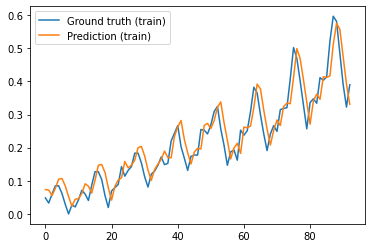

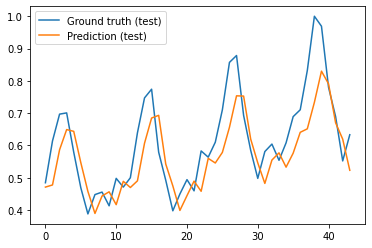

In [13]:
# Plot the results
plt.plot(trainY[0], label = 'Ground truth (train)')
plt.plot(trainPredict[:,0], label = 'Prediction (train)')
plt.legend()
plt.show()
plt.close('all')
plt.plot(testY[0], label = 'Ground truth (test)')
plt.plot(testPredict[:,0], label = 'Prediction (test)')
plt.legend()
plt.show()